# Pre-trained YOLOv3

In [1]:
import yolo3_one_file_to_detect_them_all as yolo3

Using TensorFlow backend.
/home/samantha/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/samantha/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/samantha/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/samantha/.local/lib/python3.6/site-packages/tensorflo

In [2]:
# yolo3 parameters
net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]


In [3]:
# Define the Model
model = yolo3.make_yolov3_model()

In [4]:
# load the model weights from file yolov3.weights
weight_reader = yolo3.WeightReader('yolov3.weights')

In [5]:
# set the model weights into the model
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [6]:
# save the model
model.save('yolov3.h5')

# Load an image

In [7]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
file_name = 'zebra.jpg'

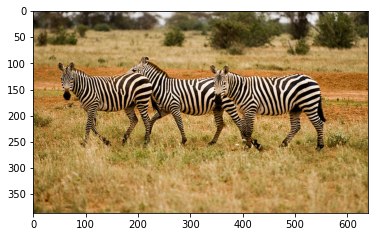

(640, 386)


In [9]:
# load an image
image = load_img(file_name)
plt.imshow(image)
plt.show()
print(image.size)

In [10]:
# keep image width and height
image_w, image_h = image.size

In [11]:
# YOLOv3 model expects input shape = (416, 416, 3)
image = load_img(file_name, target_size=(net_w, net_h))

# convert image to numpy array
image = img_to_array(image)
print(image.shape)

(416, 416, 3)


In [12]:
# preprocess input
# option 1 : reshape and normalize image manually
# option 2 : preprocess_input of yolo3
image = yolo3.preprocess_input(image, net_h, net_w)

In [13]:
print(image.shape)
print(image.min())
print(image.max())
print(image.dtype)

(1, 416, 416, 3)
0.0
1.0
float64


Note : now we have  
YOLOv3 model : model  
preprocessed input : image  
original image width : image_w  
original image height : image_h  

We're ready to make a prediction.

# Make a Prediction 

In [14]:
yhat = model.predict(image)

In [15]:
# explore the yhat
print(type(yhat))
print(len(yhat))
print(type(yhat[0]))
print([a.shape for a in yhat])

<class 'list'>
3
<class 'numpy.ndarray'>
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


These arrays predict both the bounding boxes and class labels.  
They need to be decoded.

# Interprete the Results : detection

In [16]:
# decode the bounding boxes from the yhat
class_threshold = 0.6
nms_threshold = 0.5
boxes = list()
for i in range(len(yhat)):
    boxes += yolo3.decode_netout(yhat[i][0], anchors[i], class_threshold, nms_threshold, net_h, net_w)

In [17]:
# explore the boxex result
print(len(boxes))
print(type(boxes[0]))
print(dir(boxes[0]))
print(boxes[0].classes)
print(boxes[0].label)
print(boxes[0].score)

10647
<class 'yolo3_one_file_to_detect_them_all.BoundBox'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'classes', 'get_label', 'get_score', 'label', 'objness', 'score', 'xmax', 'xmin', 'ymax', 'ymin']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
-1
-1


In [18]:
# correct the sizes of the bounding boxes
yolo3.correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)

In [19]:
# suppress non-maximal boxes 
# to merge the overlap boxes to the same object
yolo3.do_nms(boxes, nms_threshold)  

In [20]:
# explore boxes (again)
print(len(boxes))

10647


In [21]:
# get details of the valid objects
v_boxes, v_labels, v_scores = list(), list(), list()

for box in boxes :
    for i in range(len(labels)):
        if box.classes[i] > class_threshold:
            v_boxes.append((box.xmin, box.ymin, box.xmax, box.ymax))
            v_labels.append(labels[i])
            v_scores.append(box.classes[i]*100.0)

In [22]:
# summarize what we found
for i in range(len(v_boxes)):
    print('%s:%.3f' %(v_labels[i], v_scores[i]))

zebra:98.693
zebra:99.886
zebra:98.062


In [23]:
from matplotlib.patches import Rectangle

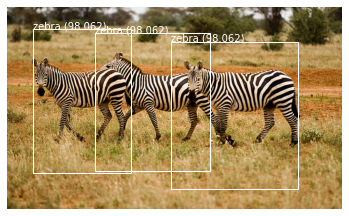

In [24]:
# draw boxes into image

fig = plt.figure()
# load image as numpy array
image = plt.imread(file_name)
# plot the image
plt.imshow(image)
# get current axis
ax = plt.gca()

# plot each box
for box in v_boxes :
    # get coordinates
    x1, y1, x2, y2 = box
    # calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    # create rectangle
    rect = Rectangle((x1, y1), width, height, fill=False, color='white')
    # draw the rectangle on the image
    ax.add_patch(rect)
    # add text and score on the top left corner
    label = "%s (%.3f)" %(v_labels[i], v_scores[i])
    plt.text(x1, y1, label, color='white')

plt.axis('off')
plt.show()

# save the result
fig.savefig('final_result.jpg', bbox_inches='tight')

In [25]:
# option 2 : draw bounding boxes on the image using yolo3.draw_boxes function
# yolo3.draw_boxes(image, boxes, labels, obj_thresh) 
# cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], (image).astype('uint8')) 